# **Python Regex**

* A regular expression (or regex) is a sequence of characters that specifies a search pattern. In practice, you’ll find the regular expressions in many applications such as search engines, search and replace dialogs of text editors.

* In Python, a regular expression is a separate programming language. It is embedded in Python. To interact with the regular expressions, you use the built-in re module:

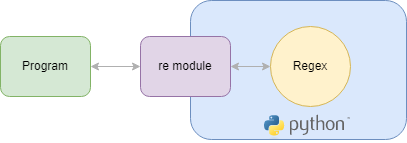

* The re module has many helpful classes and functions that help you to manage regular expressions effectively.
* The following shows an example of a simple regular expression:

In [1]:
'\d'

'\\d'

* In this example, a regular expression is a string that contains a search pattern. The '\d' is a digit character set that matches any single digit from 0 to 9.
* To use this regular expression, you follow these steps:

  * First, import the re module:

In [2]:
import re

* Second, compile the regular expression into a Pattern object:

In [3]:
p = re.compile('\d')


* Third, use one of the methods of the Pattern object to match a string:

In [4]:
s = "Python 3.10 was released on October 04, 2021"
result = p.findall(s)

print(result)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


In [5]:
#The findall() method returns a list of single digits in the string s.
# The following shows the complete program:
import re


p = re.compile('\d')
s = "Python 3.10 was released on October 04, 2021"

results = p.findall(s)
print(results)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


* Besides the findall() method, the Pattern object has other essential methods that allow you to match a string:
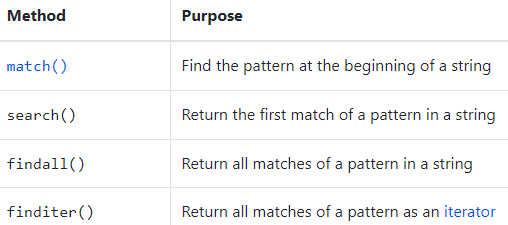

## **Python regular expression functions**
* Besides the Pattern class, the re module has some functions that match a string for a pattern:

  * match()
  * search()
  * findall()
  * finditer()
* These functions have the same names as the methods of the Pattern object. Also, they take the same arguments as the corresponding methods of the Pattern object. 
* However, you don’t have to manually compile the regular expression before using it.

* The following example shows the same program that uses the findall() function instead of the findall() method of a Pattern object:

In [6]:
import re

s = "Python 3.10 was released on October 04, 2021."
results = re.findall('\d',s)
print(results)

['3', '1', '0', '0', '4', '2', '0', '2', '1']


* Using the functions in the re module is more concise than the methods of the Pattern object because you don’t have to compile regular expressions manually.

* Under the hood, these functions create a Pattern object and call the appropriate method on it. They also store the compiled regular expression in a cache for speed optimization.

* It means that if you call the same regular expression from the second time, these functions will not need to recompile the regular expression. Instead, they get the compiled regular expression from the cache.

* Should you use the re functions or methods of the Pattern object?

* If you use a regular expression within a loop, the Pattern object may save a few function calls. However, if you use it outside of loops, the difference is very little due to the internal cache.

* The following sections discuss the most commonly used functions in the re module including search(), match(), and fullmatch().

### **search() function**
* The search() function searches for a pattern within a string. If there is a match, it returns the first Match object or None otherwise. For example:


In [7]:
import re

s = "Python 3.10 was released on October 04, 2021."

pattern = '\d{2}'
match = re.search(pattern, s) 
print(type(match))
print(match)

<class 're.Match'>
<re.Match object; span=(9, 11), match='10'>


* In this example, the search() function returns the first two digits in the string s as the Match object.

### **Match object**
* The Match object provides the information about the matched string. It has the following important methods:
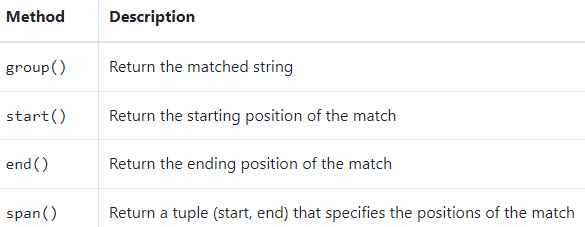

In [8]:
#The following example examines the Match object:
import re


s = "Python 3.10 was released on October 04, 2021."
result = re.search('\d', s) 

print('Matched string:',result.group())
print('Starting position:', result.start())
print('Ending position:',result.end())
print('Positions:',result.span())

Matched string: 3
Starting position: 7
Ending position: 8
Positions: (7, 8)


### **match() function**
* The match() function returns a Match object if it finds a pattern at the beginning of a string. For example:


In [9]:
import re

l = ['Python', 
    'CPython is an implementation of Python written in C', 
    'Jython is a Java implementation of Python',
     'IronPython is Python on .NET framework']

pattern = '\wython'
for s in l:
    result = re.match(pattern,s)
    print(result)

<re.Match object; span=(0, 6), match='Python'>
None
<re.Match object; span=(0, 6), match='Jython'>
None


* In this example, the \w is the word character set that matches any single character.

* The \wython matches any string that starts with any sing word character and is followed by the literal string ython, for example, Python.

* Since the match() function only finds the pattern at the beginning of a string, the following strings match the pattern:<br />
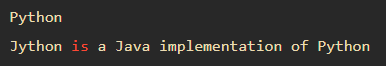

* And the following string doesn’t match:<br />
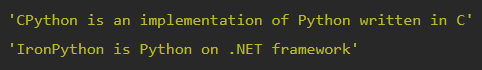

### **fullmatch() function**
* The fullmatch() function returns a Match object if the whole string matches a pattern or None otherwise. 
* The following example uses the fullmatch() function to match a string with four digits:




In [10]:
import re

s = "2021"
pattern = '\d{4}'
result = re.fullmatch(pattern, s)
print(result)

<re.Match object; span=(0, 4), match='2021'>


* The pattern '\d{4}' matches a string with four digits. Therefore, the fullmatch() function returns the string 2021.

* If you place the number 2021 at the middle or the end of the string, the fullmatch() will return None. For example:

In [11]:
import re

s = "Python 3.10 released in 2021"
pattern = '\d{4}'
result = re.fullmatch(pattern, s)
print(result)


None


## **Regular expressions and raw strings**
* It’s important to note that Python and regular expression are different programming languages. They have their own syntaxes.

* The re module is the interface between Python and regular expression programming languages. It behaves like an interpreter between them.

* To construct a pattern, regular expressions often use a backslash '\' for example \d and \w . But this collides with Python’s usage of the backslash for the same purpose in string literals.

* For example, suppose you need to match the following string:
<br />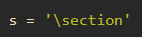

* In Python, the backslash (\) is a special character. To construct a regular expression, you need to escape any backslashes by preceding each of them with a backslash (\):<br />
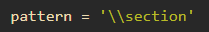

* In regular expressions, the pattern must be '\\section'. However, to express this pattern in a string literal in Python, you need to use two more backslashes to escape both backslashes again:<br />
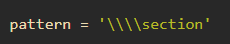

* Simply put, to match a literal backslash ('\'), you have to write '\\\\' because the regular expression must be '\\' and each backslash must be expressed as '\\' inside a string literal in Python.

* This results in lots of repeated backslashes. Hence, it makes the regular expressions difficult to read and understand.

* A solution is to use the raw strings in Python for regular expressions because raw strings treat the backslash (\) as a literal character, not a special character.

* To turn a regular string into a raw string, you prefix it with the letter r or R. For example:

In [12]:
import re

s = '\section'
pattern = r'\\section'
result = re.findall(pattern, s)

print(result)


['\\section']


* Note that in Python ‘\section’ and ‘\\section’ are the same:

In [13]:
p1 = '\\section'
p2 = '\section'

print(p1==p2) # true

True


* In practice, you’ll find the regular expressions constructed in Python using the raw strings.

## **Python Regex Character Set**
### **Introduction to Python regex character sets**
* A character set (or a character class) is a set of characters, for example, digits (from 0 to 9), alphabets (from a to z), and whitespace.

* A character set allows you to construct regular expressions with patterns that match a string with one or more characters in a set.

### **\d: digit character set**
* Regular expressions use \d to represent a digit character set that matches a single digit from 0 to 9.

* The following example uses the finditer() function to match every single digit in a string using the \d character set:

In [14]:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d', s)
for match in matches:
    print(match.group())

3
0
2
0
0
8


In [15]:
#To match a group of two digits, you use the \d\d. For example:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d\d', s)
for match in matches:
    print(match.group())

20
08


In [16]:
#Similarly, you can match a group of four digits using the \d\d\d\d pattern:
import re

s = 'Python 3.0 was released in 2008'
matches = re.finditer('\d\d\d\d', s)
for match in matches:
    print(match.group())

2008


* Later, you’ll learn how to use quantifiers to shorten the pattern. So instead of using the \d\d\d\d pattern, you can use the shorter one like \d{4}

### **\w: the word character set**
* Regular expressions use \w to represent the word character set. The \w matches a single ASCII character including Latin alphabet, digit, and underscore (_).

* The following example uses the finditer() function to match every single word character in a string using the \w character set:

In [17]:
import re

s = 'Python 3.0'
matches = re.finditer('\w', s)
for match in matches:
    print(match.group())

    

P
y
t
h
o
n
3
0


* Notice that the whitespace and . are not included in the matches.

### **\s : whitespace character set**
* The \s matches whitespace including a space, a tab, a newline, a carriage return, and a vertical tab.

* The following example uses the whitespace character set to match a space in a string:

In [18]:
import re

s = 'Python 3.0'
matches = re.finditer('\s', s)
for match in matches:
    print(match)

<re.Match object; span=(6, 7), match=' '>


### **Inverse character sets**
* A character set has an inverse character set that uses the same letter but in uppercase. The following table shows the character sets and their inverse ones:
<br />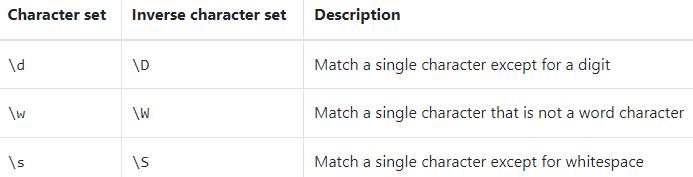

* The following example uses the \D to match the non-digit from a phone number:

In [19]:
import re

phone_no = '+1-(650)-513-0514'
matches = re.finditer('\D', phone_no)
for match in matches:
    print(match.group())

+
-
(
)
-
-


In [20]:
#To turn the phone number +1-(650)-513-0514 into the 16505130514, you can use the sub() function:
import re

phone_no = re.sub('\D', '', '+1-(650)-513-0514')
print(phone_no)

16505130514


* In this example, the sub() function replaces the character that matches the pattern \D with the literal string '' in the formatted phone number.

### **The dot(.) character set**
* The dot (.) character set matches any single character except the new line (\n). 
* The following example uses the dot (.) character set to match every single character but the new line:


In [21]:
import re

version = "Python\n4"
matches = re.finditer('.', version)
for match in matches:
    print(match.group())

P
y
t
h
o
n
4


## **Python Regex Anchors**
### **Introduction to the regex anchors**
* Regular expressions provide you with two anchors that match the positions of characters:

  * **^** – the caret anchor matches at the beginning of a string.
  * **$** – the dollar anchor matches at the end of a string.
The following example uses the \d\d to match two digits in a time string:

In [22]:
#The following example uses the \d\d to match two digits in a time string:
import re

time = '12:20'
matches = re.finditer('\d\d', time)
for match in matches:
    print(match.group())

12
20


In [23]:
#If you use the caret anchor (^), you’ll get one group which is the two digits at the beginning of the string. For example:
import re

time = '12:20'
matches = re.finditer('^\d\d', time)
for match in matches:
    print(match.group())

12


In [24]:
#Similarly, if you use the $ anchor, you’ll get the last two digits because the $ matches \d\d at the end of the time string:
import re

time = '12:20'
matches = re.finditer('\d\d$', time)
for match in matches:
    print(match.group())

20


In [25]:
#To check if a string is a time string, you can combine the caret (^) and dollar ($) anchors. For example:
import re

time = '12:20'
matches = re.finditer('^\d\d:\d\d$', time)
for match in matches:
    print(match.group())

12:20


* Note that the pattern ^\d\d:\d\d$ doesn’t validate the valid hour and minute. For example, it also matches the following string:
  
  * 30:99

* It’s not a valid time string because the valid hour is from 1 to 24 and the valid minute is from 00 to 59. Later, you’ll learn how to match the time string with valid values using the alternation.

## **Python Regex Word Boundary**
### **Introduction to the Python regex word boundary**
* A string has the following positions that qualify as word boundaries:

  * Before the first character in the string if the first character is a word character (\w).
  * Between two characters in the string if the first character is a word character (\w) and the other is not (\W – inverse character set of the word character \w).
  * After the last character in a string if the last character is the word character (\w)
* The following picture shows the word boundary positions in the string "PYTHON 3!":<BR />
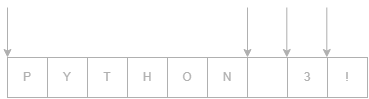

* In this example, the "PYTHON 3!" string has four word boundary positions:

  * Before the letter P (criteria #1)
  * After the letter N (criteria #2)
  * Before the digit 3 (criteria #2)
  * After the digit 3 (criteria #2)
* Regular expressions use the \b to represent a word boundary. For example, you can use the \b to match the whole word using the following pattern:<br />
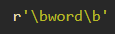

* The following example matches the word Python in a string:

In [26]:
import re

s = 'CPython is the implementation of Python in C'
matches = re.finditer('Python', s)
for match in matches:
    print(match.group())

Python
Python


* It returns two matches, one in the word CPython and another in the word Python. However, if you use the word boundary \b, the program returns one match:

In [27]:
import re

s = 'CPython is the implementation of Python in C'
matches = re.finditer(r'\bPython\b', s)
for match in matches:
    print(match.group())


Python


* In this example, the '\bPython\b' pattern match the whole word Python in the string 'CPython is the implementation of Python in C'.


## **Python Regex Quantifiers**

### **Introduction to Python regex quantifiers**
* In regular expressions, quantifiers match the preceding characters or character sets a number of times. 
* The following table shows all the quantifiers and their meanings:<br />
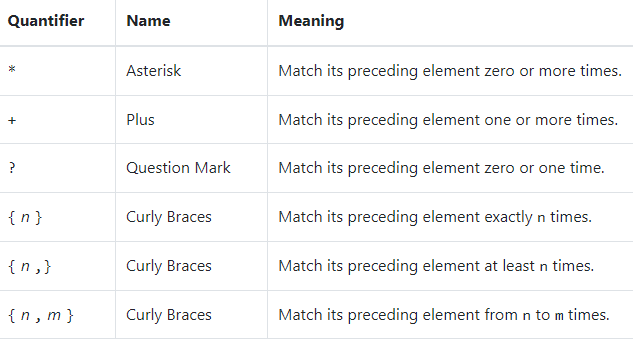

### **Match zero or more times (*)**
* The quantifier (*) matches its preceding element zero or more times. 
* For example, the following program uses the * quantifier to match any string that ends with Python:

In [28]:
import re

s = """CPython, IronPython, and JPython 
       are major Python's implementation"""

matches = re.finditer('\w*Python', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 7), match='CPython'>
<re.Match object; span=(9, 19), match='IronPython'>
<re.Match object; span=(25, 32), match='JPython'>
<re.Match object; span=(51, 57), match='Python'>


* In this example:

  * The \w matches any single word character.
  * So the \w* matches zero or more word characters.
  * Therefore, the \w*Python match any zero or more characters followed by the string Python.
* As a result, the \w*Python pattern matches CPython, IronPython, JPython, and Python in the string:
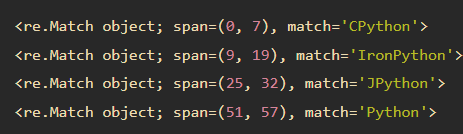

### **Match one or more times (+)**
* The **+** quantifier matches its preceding element one or more times. For example, the \d+ matches one or more digits.

* The following example uses the + quantifier to match one or more digits in a string:


In [29]:
import re

s = "Python 3.10 was released in 2021"

matches = re.finditer('\d+', s)

for match in matches:
    print(match)

<re.Match object; span=(7, 8), match='3'>
<re.Match object; span=(9, 11), match='10'>
<re.Match object; span=(28, 32), match='2021'>


### **Match zero or one time (?)**
* The **?** quantifier matches its preceding element zero or one time.

* The following example uses the (?) quantifier to match both strings color and colour:

In [30]:
import re

s = "What color / colour do you like?"

matches = re.finditer('colou?r', s)

for match in matches:
    print(match)

<re.Match object; span=(5, 10), match='color'>
<re.Match object; span=(13, 19), match='colour'>


* In this example, the u? matches zero or one character u. Therefore, the colou?r pattern matches both color and colour

### **Match Exactly n Times: {n}**
* The {n} quantifier matches its preceding element exactly n times, where n is zero or a positive integer.

* For example, the following program uses the quantifier {n} to match a time string in the hh:mm format:


In [31]:
import re

s = "It was 11:05 AM"

matches = re.finditer('\d{2}:\d{2}', s)

for match in matches:
    print(match)

<re.Match object; span=(7, 12), match='11:05'>


*  this example, the \d{2} matches exactly two digits. Therefore, the \d{2}:\d{2} matches a string that starts with two digits, a colon :, and ends with two digits.

### **Match at least n times: {n,}**
* The **{n,}** quantifier matches its preceding element at least n times, where n is zero or a positive integer.

* For example, the following program uses the {n, } quantifier to match the date strings with the m-d-yyyy or mm-dd-yyyy format:

In [32]:
import re

s = "5-5-2021 or 05-05-2021 or 5/5/2021"

matches = re.finditer('\d{1,}-\d{1,}-\d{4}', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='5-5-2021'>
<re.Match object; span=(12, 22), match='05-05-2021'>


### **Match from n and m times: {n,m}**
* The {n,m} quantifier matches its preceding element at least n times, but no more than m times, where n and m are zero or a positive integer. 
* For example:


In [33]:
import re

s = "5-5-2021 or 05-05-2021 or 5/5/2021"

matches = re.finditer('\d{1,2}-\d{1,2}-\d{4}', s)

for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='5-5-2021'>
<re.Match object; span=(12, 22), match='05-05-2021'>


* In this example, the pattern \d{1,2} matches one or two digits. So the pattern \d{1,2}-\d{1,2}-\d{4} matches a date string in the d-m-yyyy or dd-mm-yyyy format.

## **Python Regex Greedy**
* By default, all quantifiers work in a greedy mode. It means that the quantifiers will try to match their preceding elements as much as possible.

* Let’s start with an example to understand how the regex greedy mode works.

### **The unexpected result with greedy mode**
* Suppose you have the following HTML fragment that represents a button element:<br />
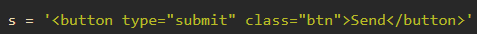

* And you want to match the texts within the quotes ("") like submit and btn.

* To do that, you may come up with the following pattern that includes the quote (“), the dot (.) character set and the (+) quantifier:

  * **".+"**

* The meaning of the pattern is as follows:

  * " starts with a quote
  * . matches any character except the newline
  * + matches the preceding character one or more times
  * " ends with a quote
* The following uses the finditer() function to match the string s with the pattern:

In [34]:
import re

s = '<button type="submit" class="btn">Send</button>'

pattern = '".+"'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())

"submit" class="btn"


* The program displays the following result: <br />
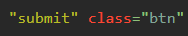

* The result is not what you expected.

* By default, the quantifier (+) runs in the greedy mode, in which it tries to match the preceding element (".) as much as possible.

### **How Python regex greedy mode works?**
* First, the regex engine starts matching from the first character in the string s.

* Next, because the first character is < which does not match the quote ("), the regex engine continues to match the next characters until it reaches the first quote ("):<br />
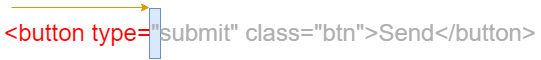

* Then, the regex engine examines the pattern and matches the string with the next rule **.+**.

* Because the **.+** rule matches a character one or more times, the regex engine matches all characters until it reaches the end of the string:
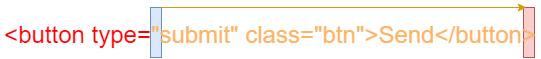

* After that, the regex engine examines the last rule in the pattern, which is a quote (“). However, it already reaches the end of the string. There’s no more character to match. It is too greedy to go too far.

* Finally, the regex engine goes back from the end of the string to find the quote (“). This step is called **backtracking**.
<b />
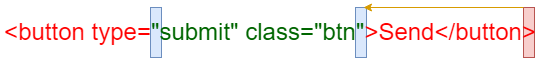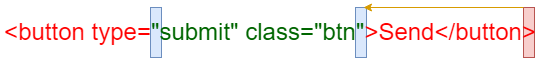

* As a result, the match is the following substring which is not what we expected:<br />
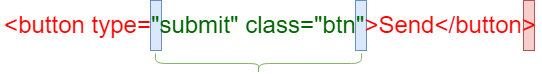



* To fix this issue, you need to instruct the quantifier (+) to use the non-greedy (or lazy) mode instead of the greedy mode.

* To do that, you add a question mark (?) after the quantifier like this:
  * **".+?"**

* The following program returns the expected result:

In [35]:
import re

s = '<button type="submit" class="btn">Send</button>'

pattern = '".+?"'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())

"submit"
"btn"


## **Python Regex Non-Greedy**

### **Introduction to the regex non-greedy (or lazy) quantifiers**
* Quantifiers allow you to match their preceding elements a number of times. 
* Quantifiers work in one of two modes: greedy and non-greedy (lazy).

* When quantifiers work in the greedy mode, they are called greedy quantifiers. Similarly, when quantifiers work in the non-greedy mode, they’re called non-greedy quantifiers or lazy quantifiers.

* By default, quantifiers work in the greedy mode. It means the greedy quantifiers will match their preceding elements as much as possible to return to the biggest match possible.

* On the other hand, the non-greedy quantifiers will match as little as possible to return the smallest match possible. non-greedy quantifiers are the opposite of greedy ones.

* To turn greedy quantifiers into non-greedy quantifiers, you add an extra question mark (?) to the quantifiers. The following table shows the greedy and their corresponding non-greedy quantifiers:

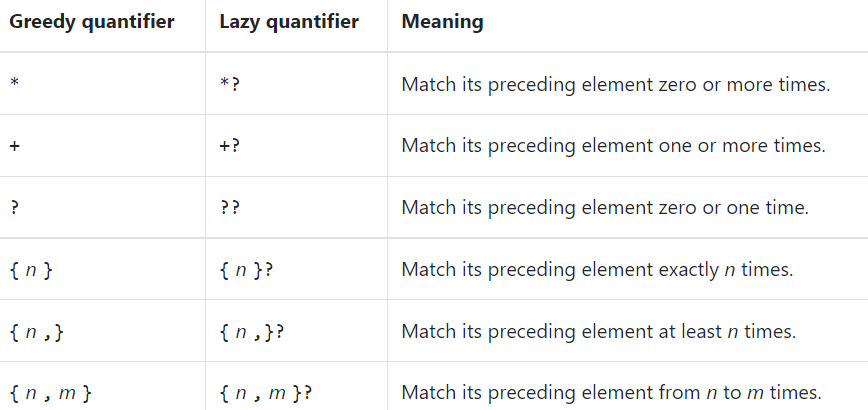

### **Python regex non-greedy quantifiers example**
* The following program uses the non-greedy quantifier **(+?)** to match the text within the quotes **("")** of a button element:

In [1]:
import re

s = '<button type="submit" class="btn">Send</button>'

pattern = '".+?"'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())


"submit"
"btn"


## **Sets and Ranges**
* Here you’ll learn how to use the sets and ranges to create patterns that match a set of characters.

* Several characters or character sets inside square brackets [] mean matching for any character or character set among them.

### **Sets**
* For example, [abc] means any of three characters. 'a', 'b', or 'c'. The [abc] is called a set. 
* And you can use the set with regular characters to construct a search pattern.

* For example, the following program uses the pattern licen[cs]e that matches both license and licence:

In [2]:
import re

s = 'A licence or license'

pattern = 'licen[cs]e'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())

licence
license


* The pattern licen[cs]e searches for:

    * licen
    * then one of the letters [cs]
    * then e.
* Therefore, it matches license and licence.

### **Ranges**
* When a set consists of many characters in e.g., from a to z or 1 to 9, it’ll tedious to list them in a set. Instead, you can use character ranges in square brackets. For example, [a-z] is a character in the range from a to z and [0-9] is a digit from 0 to 9.

* Also, you can use multiple ranges within the same square brackets. For example, [a-z0-9] has two ranges that match for a character that is either from a to z or a digit from 0 to 9.

* Similarly, you can use one or more character sets inside the square brackets like [\d\s] means a digit or a space character.

* Likewise, you can mix the character with character sets. For example, [\d_] matches for a digit or an underscore.

### **Excluding sets & ranges**
* To negate a set or a range, you use the caret character (^) at the beginning of the set and range. For example, the range [^0-9] matches any character except a digit. It is the same as the character set \D.

* Notice that regex also uses the caret (^) as an anchor that matches at the beginning of a string. However, if you use the caret (^) inside the square brackets, the regex will treat it as a negation operator, not an anchor.

* The following example uses the caret (^) to negate the set [aeoiu] to match the consonants in the string 'Python':

In [3]:
import re

s = 'Python'

pattern = '[^aeoiu]'
matches = re.finditer(pattern, s)

for match in matches:
    print(match.group())


P
y
t
h
n


## **Grouping**
* This section shows you how to use the grouping to extract portions of information, reference the preceding group, and apply alternation.
### **Introduction to the Python regex capturing groups**
* Suppose you have the following path that shows the news with the id 100 on a website:
<br />
![image.png](attachment:image.png)
* The following regular expression matches the above path:
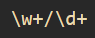
* Note that the above regular expression also matches any path that starts with one or more word characters, e.g., posts, todos, etc. not just news.
* In this pattern:

    * **\w+** is a word character set with a quantifier **(+)** that matches one or more word characters.
    * **/** mathes the forward slash / character.
    * **\d+** is digit character set with a quantfifer (+) that matches one or more digits.
* The following program uses the \w+/\d+ pattern to match the string ‘news/100':



In [4]:
import re

s = 'news/100'
pattern = '\w+/\d+'

matches = re.finditer(pattern,s)
for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='news/100'>


* It shows one match as expected.

* To get the id from the path, you use a capturing group. To define a capturing group for a pattern, you place the rule in parentheses:
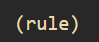
* For example, to create a capturing group that captures the id from the path, you use the following pattern:
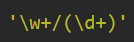
* In this pattern, we place the rule \d+ inside the parentheses (). If you run the program with the new pattern, you’ll see that it displays one match:

In [5]:
import re

s = 'news/100'
pattern = '\w+/(\d+)'

matches = re.finditer(pattern, s)
for match in matches:
    print(match)

<re.Match object; span=(0, 8), match='news/100'>


* To get the capturing groups from a match, you the group() method of the Match object:
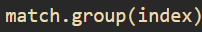
* The group(0) will return the entire match while the group(1), group(2), etc., return the first, second, … group.

* The lastindex property of the Match object returns the last index of all subgroups. The following program shows the entire match (group(0)) and all the subgroups:


In [6]:
import re

s = 'news/100'
pattern = '\w+/(\d+)'

matches = re.finditer(pattern, s)
for match in matches:
    for index in range(0, match.lastindex + 1):
        print(match.group(index))

news/100
100


* In the output, the news/100 is the entire match while 100 is the subgroup.

* If you want to capture also the resource (news) in the path (news/100), you can create an additional capturing group like this:
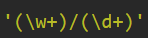
* In this pattern, we have two capturing groups one for \w+ and the other for \d+ . The following program shows the entire match and all the subgroups:


In [7]:
import re

s = 'news/100'
pattern = '(\w+)/(\d+)'

matches = re.finditer(pattern, s)
for match in matches:
    for index in range(0, match.lastindex + 1):
        print(match.group(index))

news/100
news
100


* In the output, the news/100 is the entire match while news and 100 are the subgroups.

### **Named capturing groups**
* By default, you can access a subgroup in a match using an index, for example, match.group(1). Sometimes, accessing a subgroup by a meaningful name is more convenient.

* You use the named capturing group to assign a name to a group. The following shows the syntax for assigning a name to a capturing group:
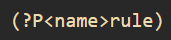

* In this syntax:

    * **()** indicates a capturing group.
    *  specifies the name of the capturing group.
    * **rule** is a rule in the pattern.
* For example, the following creates the names:
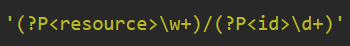
* In this syntax, the resource is the name for the first capturing group and the id is the name for the second capturing group.

* To get all the named subgroups of a match, you use the groupdict() method of the Match object. For example:


In [8]:
import re

s = 'news/100'
pattern = '(?P<resource>\w+)/(?P<id>\d+)'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.groupdict())

{'resource': 'news', 'id': '100'}


* In this example, the groupdict() method returns a dictionary where the keys are group names and values are the subgroups.

### **More named capturing group example**
* The following pattern:
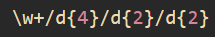
* matches this path:
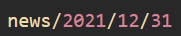
* And you can add the named capturing groups to the pattern like this:
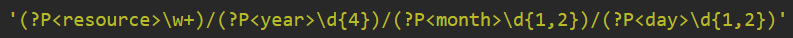
* This program uses the patterns to match the path and shows all the subgroups:

In [9]:
import re

s = 'news/2021/12/31'
pattern = '(?P<resource>\w+)/(?P<year>\d{4})/(?P<month>\d{1,2})/(?P<day>\d{1,2})'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.groupdict())

{'resource': 'news', 'year': '2021', 'month': '12', 'day': '31'}


## **Python Regex Backreferences**
### **Introduction to the Python regex backreferences**
* Backreferences like variables in Python. The backreferences allow you to reference capturing groups within a regular expression.

* The following shows the syntax of a backreference:
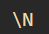
* Alternatively, you can use the following syntax:
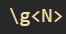
* In this syntax, N can be 1, 2, 3, etc. that represents the corresponding capturing group.
* Note that the \g<0> refer to the entire match, which has the same value as the match.group(0).
* Suppose you have a string with the duplicate word Python like this:


In [10]:
s = 'Python Python is awesome'

* And you want to remove the duplicate word (Python) so that the result string will be:
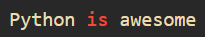
* To do that, you can use a regular expression with a backreference.

* First, match a word with one or more characters and one or more space:
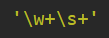
* Second, create a capturing group that contains only the word characters:
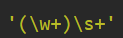
* Third, create a backreference that references the first capturing group:
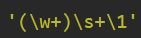
* In this pattern, the \1 is a backreference that references the (\w+) capturing group.

* Finally, replace the entire match with the first capturing group using the sub() function from the re module:

In [11]:
import re

s = 'Python Python is awesome'

new_s = re.sub(r'(\w+)\s+\1', r'\1', s)

print(new_s)

Python is awesome


## **More Python regex backreference examples**
* Let’s take some more examples of using backreferences.

### **1) Using Python regex backreferences to get text inside quotes**
* Suppose you want to get the text within double quotes:
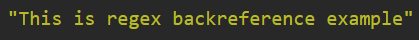
* Or single quote:
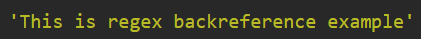
* But not mixed of single and double-quotes. The following will not match:

* To do this, you may use the following pattern:
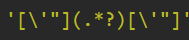
* However, this pattern will match text that starts with a single quote (‘) and ends with a double quote (“) or vice versa. For example:


In [12]:
import re

s = '"Python\'s awsome". She said'
pattern = '[\'"].*?[\'"]'

match = re.search(pattern, s)

print(match.group(0))

"Python'


* It returns the "Python' not "Python's awesome":
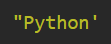
* To fix it, you can use a backreference:
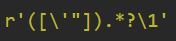
* The backreference \1 refers to the first capturing group. So if the subgroup starts with a single quote, the \1 will match the single quote. And if the subgroup starts with a double-quote, the \1 will match the double-quote.

* For example:

In [13]:
import re

s = '"Python\'s awsome". She said'
pattern = r'([\'"])(.*?)\1'

match = re.search(pattern, s)
print(match.group())

"Python's awsome"


### **2) Using Python regex backreferences to find words that have at least one consecutive repeated character**
* The following example uses a backreference to find words that have at least one consecutive repeated character:


In [14]:
import re

words = ['apple', 'orange', 'strawberry']
pattern = r'\b\w*(\w)\1\w*\b'

results = [w for w in words if re.search(pattern, w)]

print(results)

['apple', 'strawberry']


## **Python Regex Alternation**
### **Introduction to the Python regex alternation**
* To represent an alternation in regular expressions, you use the pipe operator (|). The pipe operator is called the alternation. It is like the or operator in Python.

* The following regular expression uses an alternation to match either the literal string complex and simple:
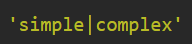
* For example, the following program uses the above regular expression to match either the literal string simple or complex:


In [15]:
import re

s = 'simple is better than complex'
pattern = r'simple|complex'

matches = re.findall(pattern,s)
print(matches)

['simple', 'complex']


### **Python regex alternation examples**
* Let’s take more examples of using the regex alternation.

#### **1) Use Python regex alternation for matching time in hh:mm format**
* To match a time string in the hh:mm format, you can combine the \d character set with the quantifiers {}:


In [16]:
'\d{2}:\d{2}'

'\\d{2}:\\d{2}'

* In this pattern:

    * **\d{2}** matches two digits.
    * **:** matches the colon character.
    * **\d{2}** matches two digits.
* However, the rule \d{2} also matches a number that is not a valid hour or minute, such as 99.

* To fix this, you can use the regex alternation.

* If the valid hour ranges from 01 to 23, you can use the following pattern to match the hour part:


* In this pattern:

    * **[01]** matches a single digit 0 or 1
    * **\d** matches a single digit from 0 to 9
    * **[01]\d** matches 00, 01 to 19
    * **2** matches the digit 2
    * **[0-3]** matches a single digit from 0 to 3 including 0, 1, 2, 3
    * **2[0-3]** matches two digits 20, 21, 22, and 23.
* Therefore, the [01]\d|2[0-3] matches two digits from 00 to 23

* Because the valid minute ranges from 00 to 59, you can use the following pattern to match it:
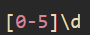

* The following regular expression combines the two rules above to match the time in the hh:mm format:
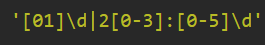

* However, this regular expression will not work as expected. For example:


In [18]:
import re

s = '09:30 30:61 22:30 25:99'
pattern = r'[01]\d|2[0-3]:[0-5]\d'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.group())

09
22:30


* In this example, the regex engine treats pattern [01]\d|2[0-3]:[0-5]\d as two main parts separated by the alternation:
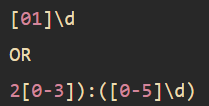
* To fix it, you need to wrap the alternation inside parentheses to indicate that only that part is alternated, not the whole expression like this:<br />
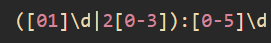
* Now, the program works as expected:


In [19]:
import re

s = '09:30 30:61 22:30 25:99'
pattern = r'([01]\d|2[0-3]):[0-5]\d'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.group())

09:30
22:30


## **Python Regex Non-capturing Group**
### **Introduction to the Python regex non-capturing group**
* Regular expressions have two types of groups:

    * Capturing groups
    * Non-capturing groups
* So far, you learned how to use a capturing group to extract information from a bigger match or rematch the previous matched group using a backreference.

* To do that, you create a capturing group, you place a pattern (or a rule) inside the parentheses, for example:
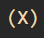
* This syntax captures whatever match X inside the match so that you can access it via the group() method of the Match object.

* Sometimes, you may want to create a group but don’t want to capture it in the groups of the match. To do that, you can use a non-capturing group with the following syntax:
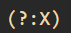

#### **Python Regex no-capturing group example**
* The following example illustrates how to use the capturing groups to capture the major and minor versions of Python in the string "Python 3.10"


In [20]:
import re

s = 'Python 3.10'
pattern = '(\d+)\.(\d+)'

match = re.search(pattern, s)

# show the whole match
print(match.group())

# show the groups
for group in match.groups():
    print(group)

3.10
3
10


* The following pattern matches one or more digits followed by the literal string (.) and one or more digits:
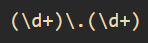
* It has two capturing groups. They capture the digits before and after the literal (.):
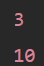
* Suppose you don’t want to capture the digits before the literal character (.), you can use a non-capturing group like this:


In [21]:
import re

s = 'Python 3.10'
pattern = '(?:\d+)\.(\d+)'

match = re.search(pattern, s)

# show the whole match
print(match.group())

# show the groups
for group in match.groups():
    print(group)

3.10
10


* In this example, we use the non-capturing group for the first group:

* To capture the minor version only, you can ignore the non-capturing group in the first place like this:

In [22]:
import re

s = 'Python 3.10'
pattern = '\d+\.(\d+)'
match = re.search(pattern, s)

# show the whole match
print(match.group())

# show the groups
for group in match.groups():
    print(group)

3.10
10


* **So why do you use the non-capturing group anyway?** the reason for using the non-capturing group is to **save memory**, as the regex engine doesn’t need to store the groups in the **buffer**.

## **Look Around**
* This section explains the concepts of different types of look-around mechanisms.

### **Python Regex Lookahead**
#### **Introduction to the Python regex lookahead**
* Sometimes, you want to match X but only if it is followed by Y. In this case, you can use the lookahead in regular expressions.

* The syntax of the lookahead is as follows:
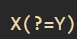

* This syntax means to search for X but matches only if it is followed by Y.

* For example, suppose you have the following string:
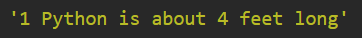

* And you want to match the number (4) that is followed by a space and the literal string feet, not the number 1. In this case, you can use the following pattern that contains a lookahead:
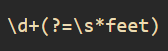

* In this pattern:

    * **\d+** is the combination of the digit character set with the + quantifier that matches one or more digits.
    * **?=** is the lookahead syntax
    * **\s*** is the combination of the whitespace character set and * quantifier that matches zero or more whitespaces.
    * **feet** matches the literal string feet.
* The following code uses the above pattern to match the number that is followed by zero or more spaces and the literal string feet:

In [23]:
import re

s = '1 Python is about 4 feet long'
pattern = '\d+(?=\s*feet)'

matches = re.finditer(pattern,s)
for match in matches:
    print(match.group())

4


#### **Regex multiple lookaheads**
* Regex allows you to have multiple lookaheads with the following syntax:
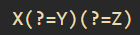

* In this syntax, the regex engine will perform the following steps:

    * Find X
    * Test if Y is immediately after X, skip if it isn’t.
    * Test if Z is also immediately after Y; skip if it isn’t.
* If both tests pass, the X is a match; otherwise, search for the next match.
* So the **X(?=Y)(?=Z)** pattern matches X followed by Y and Z simultaneously.

##### **Regex negative lookaheads**
* Suppose you want to match only the number 1 in the following text but not the number 4:
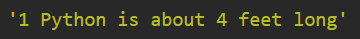
* To do that, you can use the negative lookahead syntax:
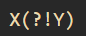
* The **X(?!Y)** matches X only if it is followed by Y. It’s the **\d+** not followed by the literal string feet:


In [24]:
import re

s = '1 Python is about 4 feet long'
pattern = '\d+(?!\s*feet)'

matches = re.finditer(pattern,s)
for match in matches:
    print(match.group())

1


### **Python Regex Lookbehind**
#### **Introduction to the Python regex lookbehind**
* In regular expressions, the lookbehind matches an element if there is another specific element before it. 
* The lookbehind has the following syntax:


* In this syntax, the pattern will match X if there is Y before it.

* For example, suppose you have the following string and want to match the number 500 not the number 1:

* To do that, you can use the following regular expression with a lookahead like this:
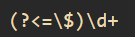

* In this pattern:
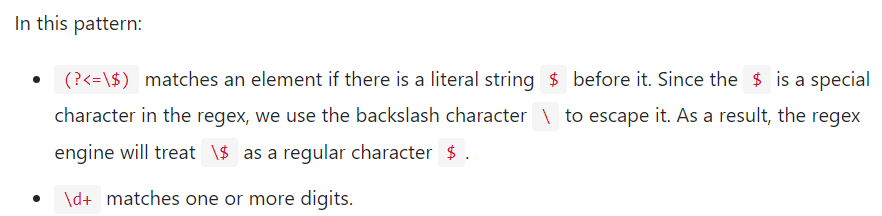


In [25]:
#The following example uses a regular expression with a lookbehind to match a number that has the $ sign before it:
import re

s = '1 phone costs $500'
pattern = '(?<=\$)\d+'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.group())


500


#### **Negative lookbehind**
* The negative lookbehind has the following syntax:
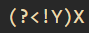
* This pattern matches X if there is no Y before it.

In [26]:
#The following example uses a negative lookbehind to match a number that doesn’t have the $ sign before it:
import re

s = '1 phone costs $500'
pattern = r'\b(?<!\$)\d+\b'

matches = re.finditer(pattern, s)
for match in matches:
    print(match.group())


1


* In the regular expression:
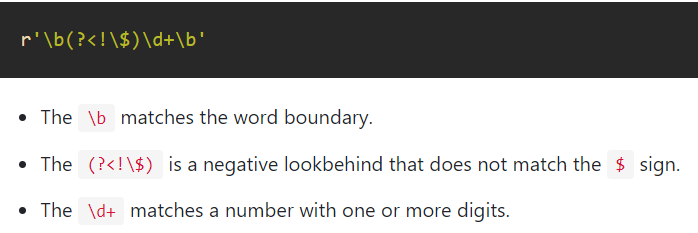

## **Python regex functions**
* This section discusses the regular expression functions in the re module in detail and the regex flags.
### **Python Regex findall()**
#### **Introduction to the Python regex findall() function**
* The **findall()** is a built-in function in the re module that handles regular expressions. The **findall()** function has the following syntax:


* In this syntax:

    * **pattern** is a regular expression that you want to match.
    * **string** is the input string
    * **flags** is one or more regular expression flags that modify the standard behavior of the pattern.
* The findall() function scans the string from left to right and finds all the matches of the pattern in the string.

* The result of the findall() function depends on the pattern:

    * If the pattern has **no** capturing groups, the findall() function returns a **list of strings** that match the whole pattern.
    * If the pattern has **one** capturing group, the findall() function returns a list of strings that match the group.
    * If the pattern has **multiple** capturing groups, the findall() function returns the tuples of strings that match the groups.
    * It’s important to note that the non-capturing groups do not affect the form of the return result.

#### **Python regex findall() function examples**
* Let’s take some examples of using the findall() function.

1) Using the Python regex findall() to get a list of matched strings
The following example uses the findall() function to get a list of color names that start with the literal string bl:

In [27]:
import re

s = "black, blue and brown"
pattern = r'bl\w+'
matches = re.findall(pattern,s)

print(matches)

['black', 'blue']


* The following pattern matches a literal string bl followed by one or more word characters specified by the **\w+** rule:

* Therefore, the findall() function returns a list of strings that match the whole pattern.

2) Using the findall() function with a pattern that has a single group
* The following example uses the findall() function to get a list of strings that match a group:


In [28]:
import re

s = "black, blue and brown"
pattern = r'bl(\w+)'
matches = re.findall(pattern,s)

print(matches)

['ack', 'ue']


* This example uses the regular expression **r'bl(\w+)'** that has one capturing group **(\w+)**. Therefore, the findall() function returns a list of strings that match the group.
* 3) Using the findall() function with a pattern that has multiple groups
    * The following example uses the findall() functions to get tuples of strings that match the groups in the pattern:

In [29]:
import re

s = "black, blue and brown"
pattern = r'(bl(\w+))'
matches = re.findall(pattern,s)

print(matches)

[('black', 'ack'), ('blue', 'ue')]


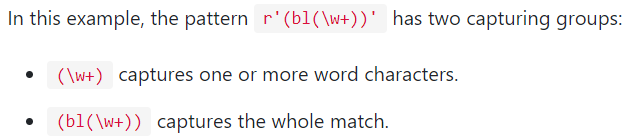

4) Using the findall() function with a regular expression flag
    * The following example uses the findall() function with the re.IGNORECASE flag:

In [30]:
import re

s = "Black, blue and brown"
pattern = r'(bl(\w+))'
matches = re.findall(pattern, s, re.IGNORECASE)

print(matches)

[('Black', 'ack'), ('blue', 'ue')]


* In this example, we use the **re.IGNORECASE** flag in the findall() function that ignores the character cases of the matched strings. Therefore, the output includes both Black and blue.

### **Python Regex fullmatch()**
#### **Introduction to the Python regex fullmatch function**
* The fullmatch() function returns a Match object if the whole string matches the search pattern of a regular expression, or None otherwise.

* The syntax of the fullmatch() function is as follows:
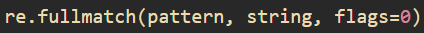
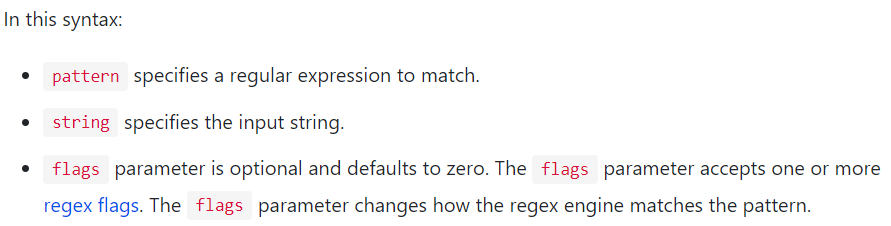

#### **Python regex fullmatch function example**
* The following example uses the fullmatch() function to validate an email address:


In [31]:
import re

email = 'no-reply@pythontutorial.net'
pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}'
match = re.fullmatch(pattern, email)

if match is not None:
    print(f'The email "{match.group()}" is valid')    
else:
    print(f'The email "{email}"" is not valid')

The email "no-reply@pythontutorial.net" is valid


* The following defines a function that uses the fullmatch() function to validate an email address. It returns True if the email is valid or raises a ValueError exception otherwise:

In [32]:
import re

def is_email(s: str) -> bool:
    pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}'
    if re.fullmatch(pattern, s) is None:
        raise ValueError(f'The {s} is not a valid email address')

    return True

* And you can use the is_email() function to validate an email like this:

In [33]:
if __name__ == '__main__':
    try:
       if is_email('no-reply@pythontutorial'):
           print('The email is valid')
    except ValueError as e:
        print(e)

The no-reply@pythontutorial is not a valid email address


#### **Python regex fullmatch vs match**
* Both fullmatch() and match() functions return a Match object if they find a match.

* The fullmatch() function matches the whole string with a pattern while the match() function only finds a match at the beginning of the string. See the following example:


In [34]:
import re

s = 'Python 3'
pattern = 'Python'

# fullmatch
match = re.fullmatch(pattern, s)
if match is not None:
    print('fullmatch:', match.group())

# search
match = re.match(pattern, s)
if match is not None:
    print('match:', match.group())

match: Python


* In this example, the fullmatch() returns None because the pattern Python only matches the beginning of the string, not the whole string.

* On the other hand, the match() function matches the pattern at the beginning of the string and returns the match.

#### **Python fullmatch vs. search**
* Both fullmatch() and search() functions return a Match object if they find a match of a pattern in a string. 
* However, the fullmatch() matches the whole string while the search() matches anywhere in the string.


In [35]:
import re

s = 'Python 3'
pattern = '\d'

# fullmatch
match = re.fullmatch(pattern,s)
if match is not None:
    print(match.group()) 

# search
match = re.search(pattern,s)
if match is not None:
    print(match.group()) # 3

3


* In this example, the pattern \d matches a single digit. The fullmatch() function returns None because the whole string 'Python 3' doesn’t match.

* However, the search() function returns a match because it could find the digit 3 at the end of the string.

### **Python Regex finditer()**
#### **Introduction to the Python regex finditer function**
* The finditer() function matches a pattern in a string and returns an iterator that yields the Match objects of all non-overlapping matches.

* The following shows the syntax of the finditer() function:
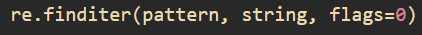

* In this syntax:

    * **pattern** is regular expression that you want to search for in the string.
    * **string** is the input string.
    * **flags** parameter is optional and defaults to zero. The flags parameter accepts one or more regex flags. The flags parameter changes how the regex engine matches the pattern.
* If the search is successful, the finditer() function returns an iterator yielding the Match objects. Otherwise, the finditer() also returns an iterator that will yield no Match object.

#### **Python regex finditer example**
* The following example uses the finditer() function to search for all vowels in a string:


In [36]:
import re

s = 'Readability counts.'
pattern = r'[aeoui]'

matches = re.finditer(pattern, s)
for match in matches:
    print(match)

<re.Match object; span=(1, 2), match='e'>
<re.Match object; span=(2, 3), match='a'>
<re.Match object; span=(4, 5), match='a'>
<re.Match object; span=(6, 7), match='i'>
<re.Match object; span=(8, 9), match='i'>
<re.Match object; span=(13, 14), match='o'>
<re.Match object; span=(14, 15), match='u'>


### **Python Regex match()**
#### **Introduction to the Python regex match function**
* The re module has the match() function that allows you to search for a pattern at the beginning of the string:
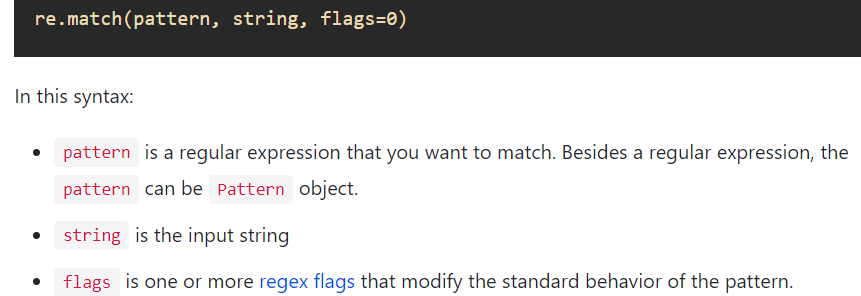

* If the search is successful, the match() function returns the corresponding Match object. Otherwise, it returns None.

* Note that the match() function only matches at the beginning of the string. If you want to find a match anywhere in the string, use the search() function instead.

#### **Python regex match() function example**
* The following example uses the match() function to check if a string starts with a digit:


In [37]:
import re

s = '3 pieces cost 5 USD'
pattern = r'\d{1}'
match = re.match(pattern, s)

if match is not None:
    print(f'The string starts with a digit {match.group()}')


The string starts with a digit 3


### **Python Regex search()**
#### **Introduction to the Python regex search() function**
* The regex search() is a function in the built-in re module that deals with regular expressions. 
* The search() function has the following syntax:
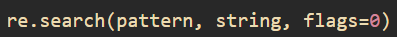
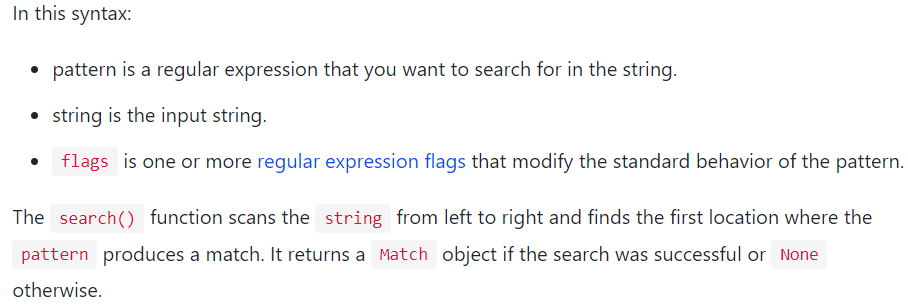

#### **Python regex search() function examples**
* Let’s take some examples of using the search() function.

* 1) Using the Python regex search() fuction to find the first match
    * The following example uses the search() function to find the first number in the string:

In [38]:
import re

s = 'Python 3 was released on Dec 3, 2008'
pattern = '\d+'

match = re.search(pattern, s)

if match is not None:
    print(match.group())
else:
    print('No match found')

3


* In this example, the pattern **\d+** matches one or more digits. The search() returns a Match object.

* To get the match, you can call the group() method of the Match object like this:


In [39]:
import re

s = 'Python 3 was released on Dec 3, 2008'
pattern = '\d+'


match = re.search(pattern, s)

if match is not None:
    print(match.group())

3


* 2) Using the Python regex search() function to find the first word that matches a pattern
    * The following example uses the search() function to search the first word that ends with the literal string thon in a string:
    

In [40]:
import re

s = 'CPython, IronPython, or Cython'
pattern = r'\b((\w+)thon)\b'

match = re.search(pattern, s)

if match is not None:
    print(match.groups())

('CPython', 'CPy')


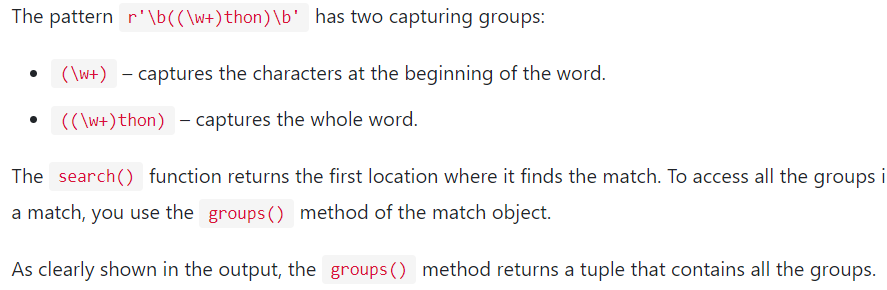

* 3) Using the Python regex search() function with a regex flag
    * The following example uses the search() function to find the first python word in a string:
    

In [41]:
import re

s = 'Python or python'
pattern = r'\bpython\b'

match = re.search(pattern, s)
print(match)

<re.Match object; span=(10, 16), match='python'>


* It returns the word python with the letter p in lowercase as specified in the pattern.
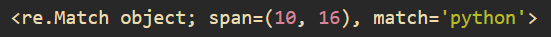

* To match the word case-insensitively, you can pass the re.IGNORECASE flag to the third argument of the search() function. 
* For example:


In [42]:
import re

s = 'Python or python'
pattern = r'\bpython\b'

match = re.search(pattern, s, re.IGNORECASE)
print(match)

<re.Match object; span=(0, 6), match='Python'>


* In this example, the search() function returns the word Python with the letter P in uppercase:
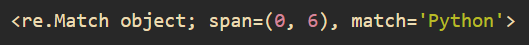

### **Python Regex sub()**
#### **Introduction to the Python regex sub function**
* The sub() is a function in the built-in re module that handles regular expressions. The sub() function has the following syntax:

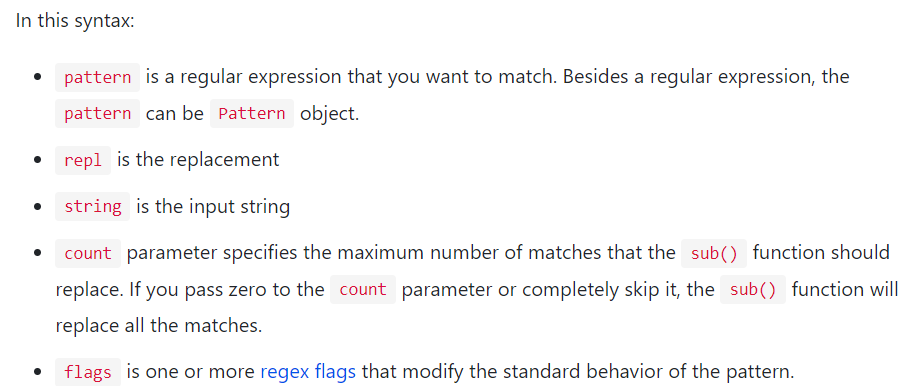

* The sub() function searches for the pattern in the string and replaces the matched strings with the replacement (repl).

* If the sub() function couldn’t find a match, it returns the original string. Otherwise, the sub() function returns the string after replacing the matches.

* Note that the sub() function replaces the leftmost non-overlapping occurrences of the pattern. And you’ll see it in detail in the following example.

#### **Python regex sub function examples**
* Let’s take some examples of using the regex sub() function.

* 1) Using the regex sub() function to return the plain phone number
    * The following example uses the sub() function to turn the phone number (212)-456-7890 into 2124567890 :

In [43]:
import re

phone_no = '(212)-456-7890'
pattern = '\D'
result = re.sub(pattern, '',phone_no)

print(result)

2124567890


* In this example, the \D is an inverse digit character set that matches any single character which is not a digit. 
* Therefore, the sub() function replaces all non-digit characters with the empty string ''.

* 2) Using the regex sub() function to replace the leftmost non-overlapping occurrences of a pattern
    * The following example replaces the 00 with the '' in the string '000000':
    

In [44]:
import re

pattern = '00'
s = '00000'
result = re.sub(pattern,'',s)

print(result)

0


* In this example, we replace two zeros with empty strings. 
* So the first two are matched and replaced, then the following two zeroes are matches and replaced too, and finally, the last digit remains unchanged.

* 3) Using the regex sub() with a backreference example
    * The following example uses the sub() function to replace the text surrounded with (*) (it’s markdown format by the way) with the <b> tag in HTML:

In [45]:
import re

s = 'Make the World a *Better Place*'
pattern = r'\*(.*?)\*'
replacement = r'<b>\1<\\b>'
html = re.sub(pattern, replacement, s)

print(html)

Make the World a <b>Better Place<\b>


* In this example, the pattern r'\*(.*?)\*' find the text that begins and ends with the asterisk (*). It has a capturing group that captures the text between asterisks (*).

* The replacement is a regular expression with a backreference. The backreference \1 refers to the first group in the pattern, which is the text between the asterisks (*).

* 4) Using the regex sub() function with the replacement as a function
* Suppose you have a list of strings where each element contain both alphabet and number:
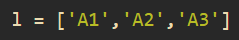

* And you want to square the number in each list element. For example, A1 becomes A1, A2 becomes A4, and A3 becomes A9. To do this, you can use the sub() function.

* The second argument of the sub() function (repl) can be a function. In this case, the sub() function will call this function for every non-overlapping occurrence of the pattern.

* This function (repl) takes a single Match object argument and returns the replacement string.

* The following illustrates how to use the second argument as a function:


In [46]:
import re

def square(match):
    num = int(match.group())
    return str(num*num)

l = ['A1','A2','A3']
pattern = r'\d+'
new_l = [re.sub(pattern, square, s) for s in l]

print(new_l)

['A1', 'A4', 'A9']


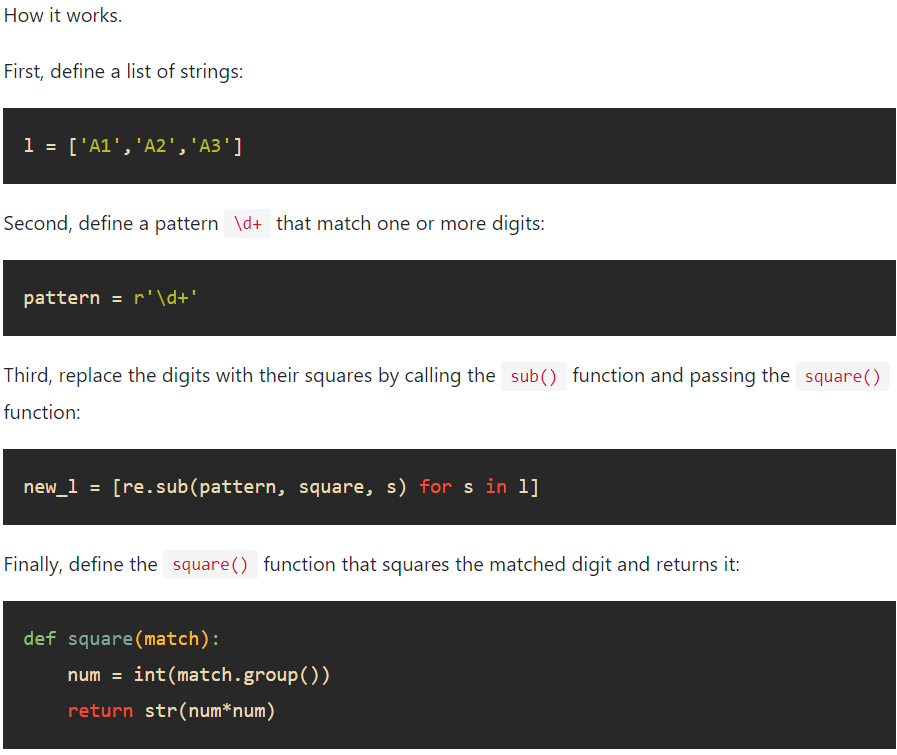

### **Python Regex split()**
#### **Introduction to the Python regex split() function**
* The built-in re module provides you with the split() function that splits a string by the matches of a regular expression.

* The split() function has the following syntax:
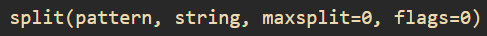

* In this syntax:

    * **pattern** is a regular expression whose matches will be used as separators for splitting.
    * **string** is an input string to split.
    * **maxsplit** determines at most the splits occur. Generally, if the maxsplit is one, the resulting list will have two elements. If the maxsplit is two, the resulting list will have three elements, and so on.
    * **flags** parameter is optional and defaults to zero. The flags parameter accepts one or more regex flags. The flags parameter changes how the regex engine matches the pattern.
* The split() function returns a list of substrings split by the matches of the pattern in the string.

* If the pattern contains one or more capturing groups, the split() function will return the text of all groups as elements of the resulting list.

* If the pattern contains a capturing group that matches the start of a string, the split() function will return a resulting list with the first element being as an empty string. This logic is the same for the end of the string.

#### **Python regex split examples**
* Let’s take some examples of using the regex split() function.

* 1) Using the split() function to split words in a sentence
    
    * The following example uses the split() function to split the words in a sentence:

In [48]:
import re

s = 'A! B. C D'
#In this example, the \W+ is the inverse of the word character set that matches one or more characters that are not the word characters.

pattern = r'\W+'

l = re.split(pattern, s)
print(l)


['A', 'B', 'C', 'D']


* 2) Using the split() function with the maxsplit argument
    * The following example uses the split() function that splits a string with two splits at non-word characters:

In [49]:
import re

s = 'A! B. C D'
pattern = r'\W+'

l = re.split(pattern, s, 2)
print(l)


['A', 'B', 'C D']


* Because we split the string with two splits, the resulting list contains three elements. 
* Notice that the split() function returns the remainder of a string as the final element in the resulting list.

* 3) Using the split() function with a capturing group**
    * The following example uses the split() function that splits a string with the \W+ pattern that contains a capturing group:


In [50]:
import re

s = 'A! B. C D'
pattern = r'(\W+)'

l = re.split(pattern, s, 2)
print(l)

['A', '! ', 'B', '. ', 'C D']


* In this example, the split() function also returns the text of the group in the resulting list.

* 4) Using the split() function
    * The following example uses the split() function where the separator contains a capturing group that matches the start of the string:
    

In [51]:
import re

s = '...A! B. C D'
pattern = r'\W+'

l = re.split(pattern, s)
print(l)

['', 'A', 'B', 'C', 'D']


* In this case, the split() function returns a list with the first element is an empty string:
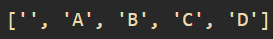
* Similarly, if the separator contains the capturing groups and it matches the end of the string, the resulting list will have the last element as an empty string:

In [52]:
import re

s = 'A! B. C D...'
pattern = r'\W+'

l = re.split(pattern, s)
print(l)


['A', 'B', 'C', 'D', '']


### **Python Regex Flags**
#### **Introduction to the Python regex flags**
* The regular expression functions like findall, finditer, search, match, split, sub, … have the parameter (flags) that accepts one or more regex flags.

* Since Python 3.6, regex flags are instances of the RegexFlag enumeration class in the re module. The following table shows the available regex flags and their meanings:
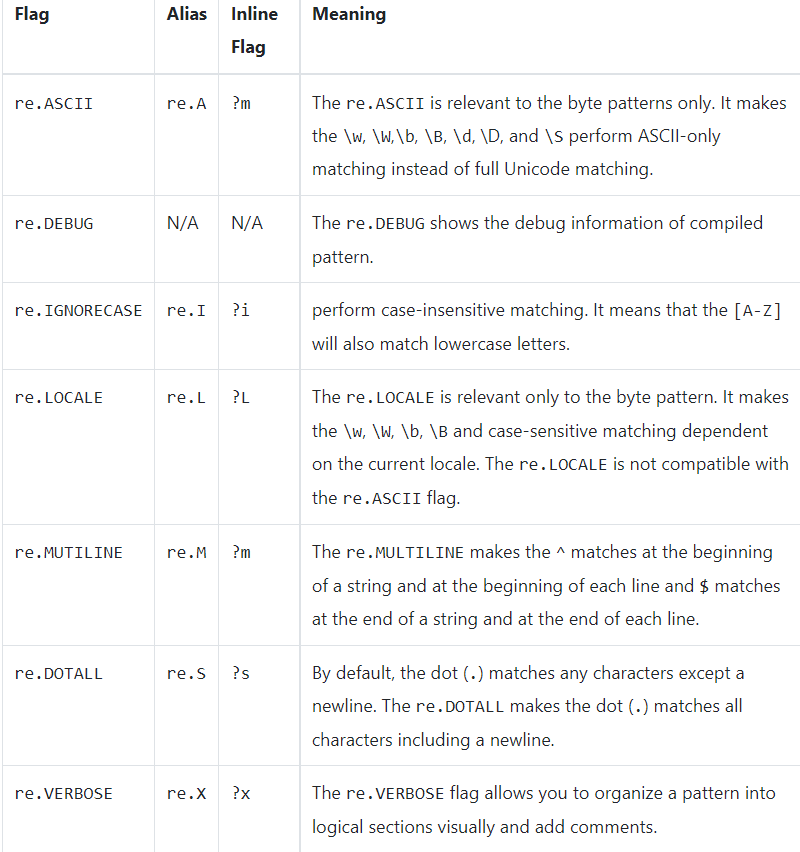

* To combine two or more flags, you use the **|** operator like this:
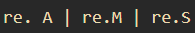

* Let’s take some examples of using the Python regex flags.

* 1) The re.IGNORECASE flag example
    * The following example uses the findall() function to match all lowercase characters in the set **[a-z]** in a string:

In [53]:
import re

s = 'Python is awesome'
pattern = '[a-z]+'

l = re.findall(pattern, s)
print(l)

['ython', 'is', 'awesome']


* Note that the letter P is not included in the result because it is not in the set [a-z].

* The following example uses the re.INGORECASE flag:

In [54]:
import re

s = 'Python is awesome'
pattern = '[a-z]+'

l = re.findall(pattern, s, re.IGNORECASE)
print(l)


['Python', 'is', 'awesome']


* Even though the pattern matches only characters in the set [a-z], the re.IGNORECASE flag instructs the regex engine to also match characters in [A-Z] set.

* 2) The re.MULTILINE flag example
    * The following example uses the ^ anchor to match one or more word characters at the beginning of a string:
    

In [55]:
import re

s = '''Regex 
Flags'''

pattern ='^\w+'

l = re.findall(pattern,s)
print(l)

['Regex']


* The **s** string has two lines. The ^ only match at the beginning of the string as expected.

* If you use the re.MULTILINE flag, the ^ will match at the beginning of each line. For example:


In [56]:
import re

s = '''Regex 
Flags'''

pattern = '^\w+'

l = re.findall(pattern, s, re.MULTILINE)
print(l)

['Regex', 'Flags']


* 3) The re.DOTALL flag example
    * In this example, the dot .+ pattern match one or more characters except for the new line:



In [57]:
import re

s = '''Regex
Flags'''

pattern = '.+'

l = re.findall(pattern, s)
print(l)

['Regex', 'Flags']


* If you use the re.DOTALL flag, the **.+** will also match the new line:

In [58]:
import re

s = '''Regex
Flags'''

pattern = '.+'

l = re.findall(pattern, s, re.DOTALL)
print(l)

['Regex\nFlags']


* 4) The re.VERBOSE flag example
    * The following example shows how to use the re.VERBOSE flag to write a pattern in sections with comments:

In [59]:
import re

s = 'Python 3'

pattern = r'''^(\w+) # match one or more characters at the beginning of the string
               \s*   # match zero or more spaces
              (\d+)$ # match one or more digits at the end of the string'''

l = re.findall(pattern, s, re.VERBOSE)
print(l)

[('Python', '3')]


* In this example, the re.VERBOSE flag allows us to add spaces and comments to the regular expression to explain each individual rule.

* 5) The re.ASCII flag example
    * The following example matches words with two characters:
   

In [60]:
import re

s = '作法 is Pythonic in Japanese'
pattern = r'\b\w{2}\b'

l = re.findall(pattern, s)
print(l)


['作法', 'is', 'in']


* However, if you use the re.ASCII flag, the matches will contain only ASCII characters:

In [61]:
import re

s = '作法 is Pythonic in Japanese'
pattern = r'\b\w{2}\b'

l = re.findall(pattern, s, re.ASCII)
print(l)

['is', 'in']


* In this example, the word **作法** was excluded from the resulting list.

## **Regex CheatSheet**
* https://www.pythontutorial.net/python-regex/python-regex-cheat-sheet/